In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
df = pd.read_csv('traffic_accidents.csv')
df_copy = df.copy()

In [3]:
df.shape

(209306, 24)

In [4]:
df.sample(10)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
119630,12/24/2016 06:07:00 PM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,18,7,12
49024,04/20/2023 05:17:00 PM,TRAFFIC SIGNAL,CLOUDY/OVERCAST,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,4.0,17,5,4
22495,08/23/2017 07:53:00 AM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,PEDALCYCLIST,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,7,4,8
196770,10/18/2018 12:15:00 AM,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0,5,10
91204,05/07/2024 06:11:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,1.0,1.0,0.0,1.0,18,3,5
50568,07/07/2019 03:40:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,6.0,15,1,7
114786,10/13/2023 11:19:00 AM,NO CONTROLS,RAIN,DAYLIGHT,FIXED OBJECT,ONE-WAY,STRAIGHT AND LEVEL,WET,"RUT, HOLES",INJURY AND / OR TOW DUE TO CRASH,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,11,6,10
123346,06/05/2019 03:00:00 PM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT ON GRADE,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,15,4,6
151504,04/27/2021 07:30:00 AM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,2.0,7,3,4
159986,11/28/2017 05:10:00 PM,STOP SIGN/FLASHER,CLEAR,DARKNESS,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,17,3,11


In [5]:
df.isna().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(31)

In [7]:
# Dropping Duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209275 non-null  object 
 1   traffic_control_device         209275 non-null  object 
 2   weather_condition              209275 non-null  object 
 3   lighting_condition             209275 non-null  object 
 4   first_crash_type               209275 non-null  object 
 5   trafficway_type                209275 non-null  object 
 6   alignment                      209275 non-null  object 
 7   roadway_surface_cond           209275 non-null  object 
 8   road_defect                    209275 non-null  object 
 9   crash_type                     209275 non-null  object 
 10  intersection_related_i         209275 non-null  object 
 11  damage                         209275 non-null  object 
 12  prim_contributory_cause        2092

In [10]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000
mean,2.063299,0.382707,0.001859,0.038103,0.221226,0.121520,2.244019,13.372897,4.144045,6.771798
std,0.396030,0.799720,0.047505,0.233971,0.614939,0.450884,1.241159,5.604019,1.966880,3.427626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [11]:
df[['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'most_severe_injury']].sample(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
148080,10/22/2019 01:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",FOLLOWING TOO CLOSELY,NO INDICATION OF INJURY
176745,11/07/2021 09:30:00 PM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY
160345,06/27/2019 02:53:00 PM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
199760,09/08/2024 12:05:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY
89884,03/09/2024 12:32:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY


1. 'roadway_surface_cond'       has 9 unique values 
2. 'crash_type'                 has 2 unique values
3. 'prim_contributory'-cause    has 40 unique values
4. 'damage'                     has 3 unique values
5. 'most_severe_injury'         has 5 unique values 
6. 'trafficwat_type'            has 20 unique values
7. 'alignment'                  has 6 unique values

In [13]:
numeric_cols = df.select_dtypes(np.number).columns.tolist()
categorical_cols = df.select_dtypes(object).columns.to_list()
print(numeric_cols)
print('\n')
print(categorical_cols)

['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']


['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'most_severe_injury']


Top 5 accidents with most injuries 

In [14]:
top5_most_injuries = df.sort_values(by='injuries_total', ascending=False).head(5)
top5_most_injuries[['most_severe_injury','injuries_total']]

,most_severe_injury,injuries_total
91225,NONINCAPACITATING INJURY,21.0
50879,INCAPACITATING INJURY,21.0
58313,INCAPACITATING INJURY,19.0
10830,FATAL,17.0
192581,NONINCAPACITATING INJURY,16.0


Top 5 accidents with most fatalities

In [15]:
top5_most_fatalities = df.sort_values(by='injuries_fatal', ascending=False).head(5)
top5_most_fatalities[['most_severe_injury','injuries_fatal']]

,most_severe_injury,injuries_fatal
54213,FATAL,3.0
160678,FATAL,3.0
189366,FATAL,3.0
194369,FATAL,3.0
79014,FATAL,2.0


Number of cars involved in crash vs total injuries

Text(0, 0.5, 'Total Injuries')

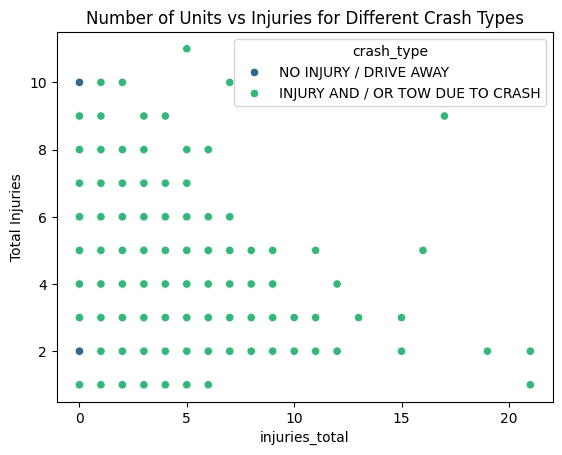

In [16]:
sns.scatterplot(df, x='injuries_total', y='num_units', hue='crash_type', palette='viridis')
plt.title('Number of Units vs Injuries for Different Crash Types')
plt.ylabel('Number of units involved in crash')
plt.ylabel('Total Injuries')

In [17]:
# from above graph it is evident that most injuries occur when the number of cars colliding is between 2 to 6 with very few no injury/drive away

Which weather condition caused more crashes

Text(0, 0.5, 'Weather Conditions')

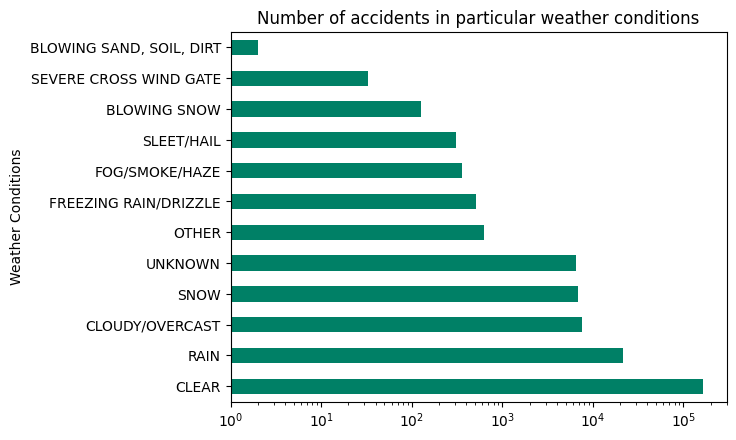

In [19]:
df['weather_condition'].value_counts().plot(kind = 'barh', log = True, ylabel = 'Total Accidents', colormap='summer')
plt.title('Number of accidents in particular weather conditions')
plt.ylabel('Weather Conditions')

In [20]:
# the top 3 weather conditions that caused most of the crashes are clear, rain, cloudy/overcast

Text(0, 0.5, 'Trafficwat types')

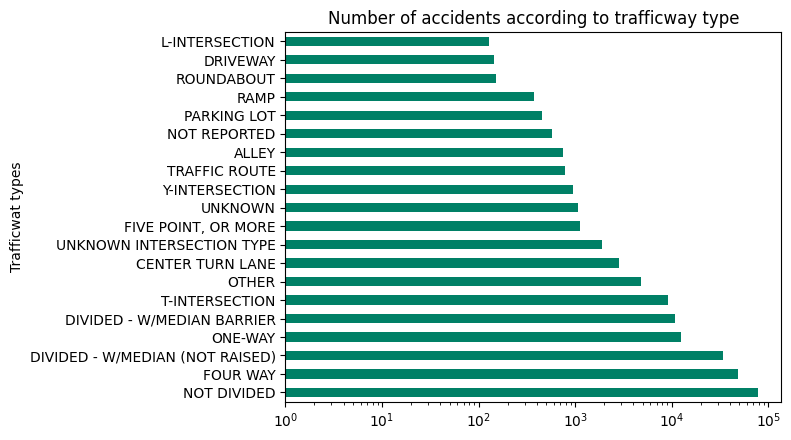

In [21]:
df['trafficway_type'].value_counts().plot(kind = 'barh', log = True, ylabel = 'Total Accidents', colormap='summer')
plt.title('Number of accidents according to trafficway type')
plt.ylabel('Trafficwat types')

In [22]:
# the top 3 trafficway types that caused most of the crashes are Not Divided, Four Way and Divided(Median not raised)

Text(0.5, 0, 'Trafficway Type')

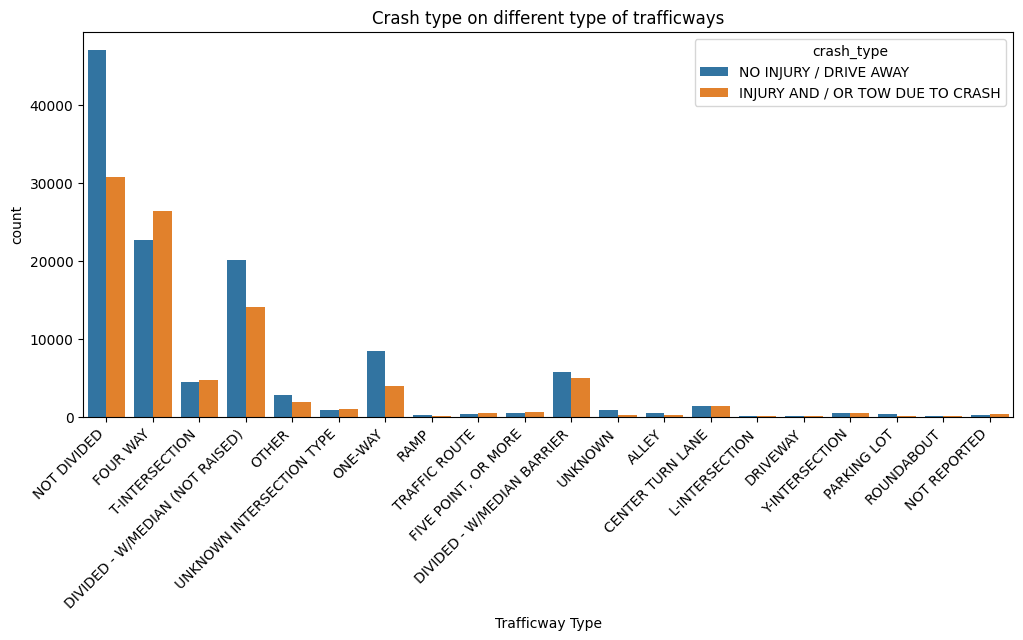

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(df, x='trafficway_type', hue='crash_type')
plt.xticks(rotation=45, ha='right')
plt.title('Crash type on different type of trafficways')
plt.xlabel('Trafficway Type')

Text(0.5, 23.52222222222222, 'Crash Type')

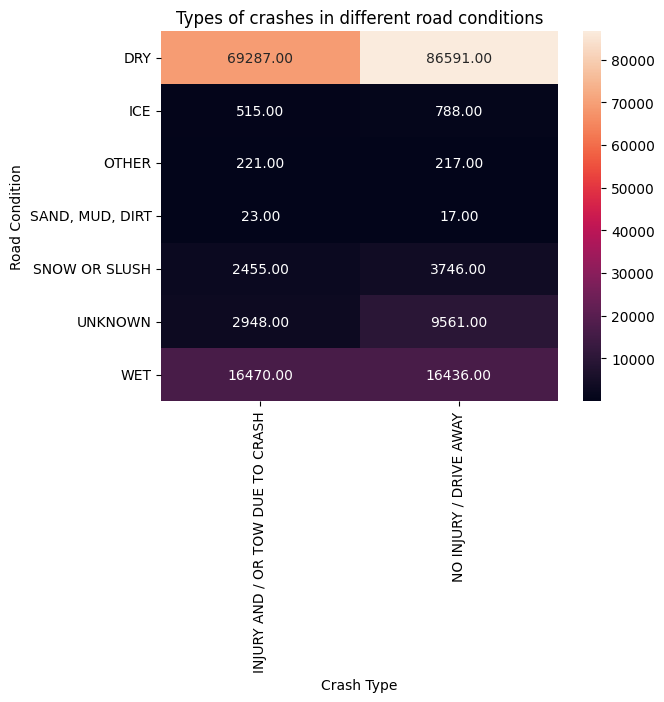

In [24]:
crosstab = pd.crosstab(df['roadway_surface_cond'], df['crash_type'])
sns.heatmap(crosstab, annot=True, fmt='.2f')
plt.title('Types of crashes in different road conditions')
plt.ylabel('Road Condition')
plt.xlabel('Crash Type')

Which traffic device caused fewer accidents

Text(0, 0.5, 'Traffic Control Device')

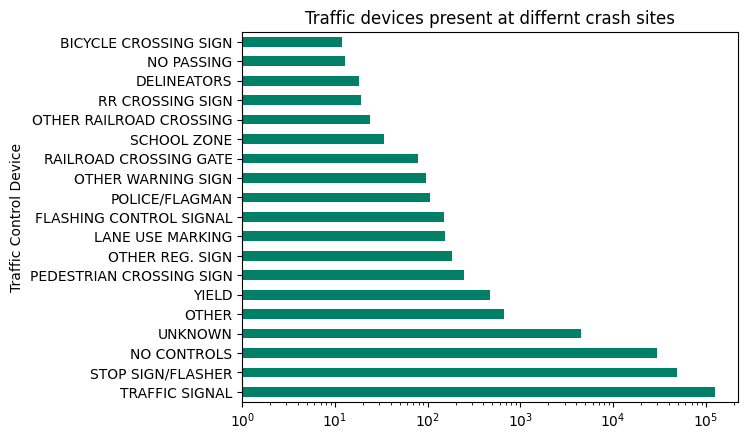

In [25]:
df['traffic_control_device'].value_counts().plot(kind='barh', log = True, colormap = 'summer')
plt.title('Traffic devices present at differnt crash sites')
plt.ylabel('Traffic Control Device')

which year had most accidents

In [26]:
# First we have to convert the crash_date column to datetime format and then we will extract the year from and plot a line plot

In [27]:
df['crash_date'] = pd.to_datetime(df['crash_date'], format='mixed') #the format %m%d%Y %T:%M:%S %p didn't worked with our string so we used mixed
df['crash_year'] = df['crash_date'].dt.year

C:\Users\Abid\AppData\Local\Temp\ipykernel_19808\1444683250.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df['crash_year'].value_counts(), palette='viridis')


Text(0.5, 0, 'Number of crashes each year')

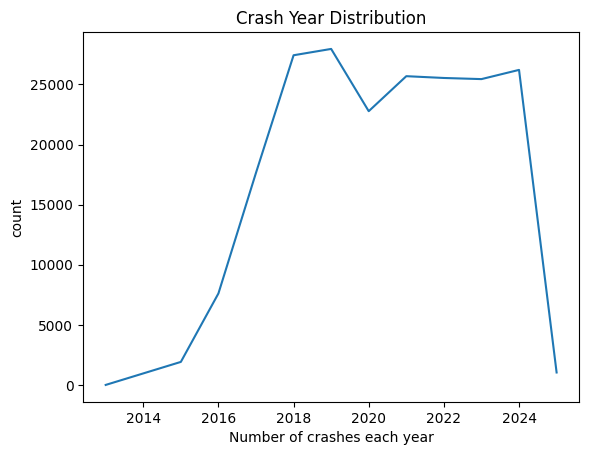

In [28]:
sns.lineplot(df['crash_year'].value_counts(), palette='viridis')
plt.title('Crash Year Distribution')
plt.xlabel('Number of crashes each year')

Crashes in the day time vs night time 

In [29]:
fullday_crash = df.groupby('crash_hour')['damage'].count()
midnight_crash = fullday_crash.iloc[0:5]
daytime_crash = fullday_crash.iloc[5:19]
nighttime_crash = fullday_crash.iloc[18:24]

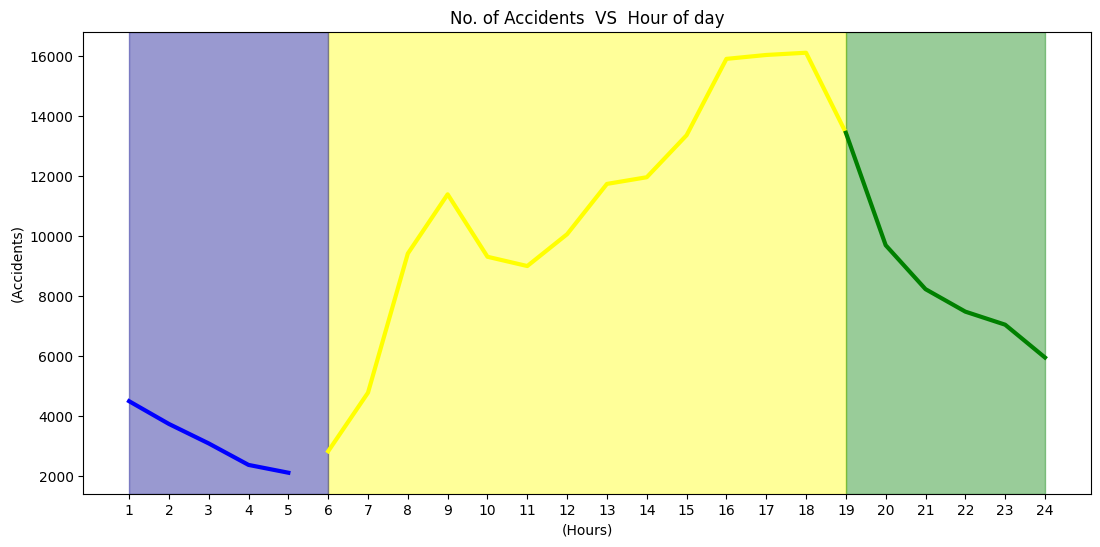

In [30]:
plt.figure(figsize=(13,6))
plt.plot(midnight_crash, label='Midnight Crash', color='blue', linewidth = 3)
plt.plot(daytime_crash, label='Day time Crash', color='yellow', linewidth = 3)
plt.plot(nighttime_crash, label='Night time Crash', color='green', linewidth = 3)
plt.title('No. of Accidents  VS  Hour of day')
plt.xlabel('(Hours)')
plt.ylabel('(Accidents)')
plt.xticks(np.arange(0,24),np.arange(1,25))
plt.axvspan(5, 18, ymin = 0,  
            ymax = 1, 
            color ='yellow', 
            alpha = 0.4) 
plt.axvspan(0, 5, ymin = 0,  
            ymax = 1, 
            color ='darkblue', 
            alpha = 0.4) 
plt.axvspan(18, 23, ymin = 0,  
            ymax = 1, 
            color ='green', 
            alpha = 0.4) 
plt.show()

What was the primary cause of accidents

In [31]:
# There are 40 unique values in prim_contributary_cause so instead of dealing with all those categories we can make broder categories like carelessness, lack of attention, rash driving and overspeeding also categories having values less then 100 will be grouped as others. These fewer categories will be easier to manipulate and visualize

In [32]:
df['prim_contributory_cause'].value_counts()

prim_contributory_cause
UNABLE TO DETERMINE                                                                 58310
FAILING TO YIELD RIGHT-OF-WAY                                                       42909
FOLLOWING TOO CLOSELY                                                               19074
DISREGARDING TRAFFIC SIGNALS                                                        14590
IMPROPER TURNING/NO SIGNAL                                                          12642
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10675
IMPROPER OVERTAKING/PASSING                                                          8302
DISREGARDING STOP SIGN                                                               6746
IMPROPER LANE USAGE                                                                  6460
NOT APPLICABLE                                                                       5241
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                         

In [33]:
category_mapping = {
    'CARELESSNESS': [
        'FOLLOWING TOO CLOSELY',
        'DISREGARDING TRAFFIC SIGNALS',
        'IMPROPER OVERTAKING/PASSING',
        'DISREGARDING STOP SIGN',
        'IMPROPER LANE USAGE'
    ],
    'LACK_OF_ATTENTION': [
        'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
        'IMPROPER BACKING',
        'DISTRACTION - FROM INSIDE VEHICLE',
        'DRIVING ON WRONG SIDE/WRONG WAY',
        'DISREGARDING OTHER TRAFFIC SIGNS',
        'DISTRACTION - FROM OUTSIDE VEHICLE'
    ]
}


In [46]:
df['general_categories'] = df['prim_contributory_cause']
for general_category, subcategories in category_mapping.items():
    df['general_categories'] = np.where(df['prim_contributory_cause'].isin(subcategories), general_category, df['general_categories'])

df['general_categories'] = np.where(df['prim_contributory_cause'].map(df['prim_contributory_cause'].value_counts()) <= 2000, 'OTHERS', df['general_categories'])

Text(0, 0.5, 'Cause of accidents')

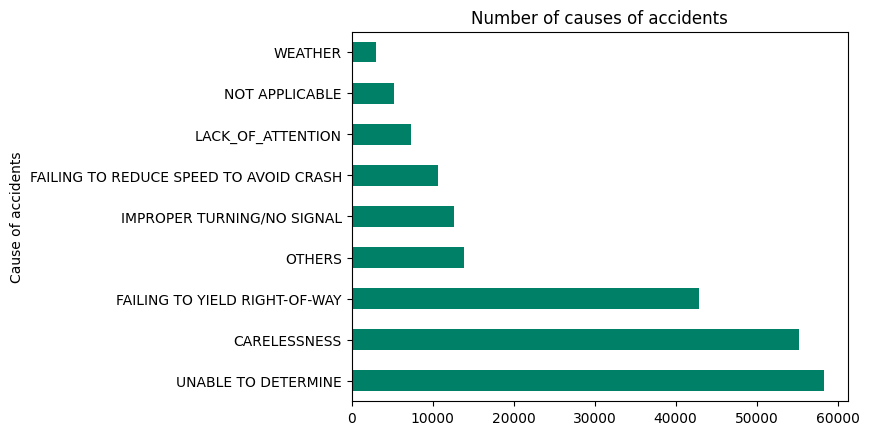

In [47]:
df['general_categories'].value_counts().plot(kind='barh', colormap='summer')
plt.title('Number of causes of accidents')
plt.ylabel('Cause of accidents')

Accidents in which road intersection was involved

Text(0.5, 1.0, 'Intersection related accidents')

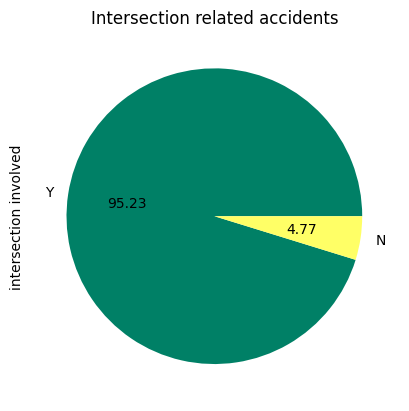

In [48]:
df['intersection_related_i'].value_counts().plot(kind='pie', ylabel='intersection involved',colormap='summer', autopct = '%.2f')
plt.title('Intersection related accidents')

Number of crashes in best condition vs worst conditions

In [49]:
# best conditions -->  weather = clear , lightning_conditions = daylight+darkness(lighted) , alignment = straight , road_surface_cond = Dry , road_defects = none
# worst conditions -->  all conditions other than best conditions 

In [50]:
best_con = df[
    (df['weather_condition'] == 'CLEAR') &
    (df['lighting_condition'].isin(['DAYLIGHT', 'DARKNESS, LIGHTED ROAD'])) &
    (df['alignment'] == 'STRAIGHT AND LEVEL') &
    (df['roadway_surface_cond'] == 'DRY') &
    (df['road_defect'] == 'NO DEFECTS')
]

In [51]:
worst_con= df[~((df['weather_condition'] == 'CLEAR') & (df['lighting_condition'].isin(['DAYLIGHT', 'DARKNESS, LIGHTED ROAD'])) & (df['alignment'] == 'STRAIGHT AND LEVEL') & (df['roadway_surface_cond'] == 'DRY') & (df['road_defect'] == 'NO DEFECTS'))]

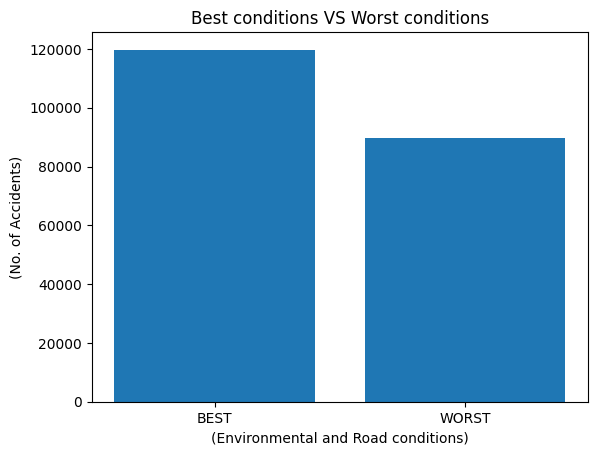

In [52]:
condition = ['BEST','WORST']
accidents = [best_con.shape[0], worst_con.shape[0]]

plt.bar(condition, accidents)
plt.title('Best conditions VS Worst conditions')
plt.xlabel('(Environmental and Road conditions)')
plt.ylabel('(No. of Accidents)')
plt.show()